In [75]:
#importing modules
import numpy as np
import pandas as pd
from itertools import combinations 
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
#importing dataset
df = pd.read_csv('sa.csv')
minsup = 0.15
minconf = 0.5
N=len(df.values)
minsupcount = int(minsup * N)
print(minsupcount)

15


In [109]:
df

,id,Bread,Milk,Diaper,Coke,Eggs,Rice,Biscuts,Potatoes,Onion,Orange,Apple,Musumbi,Watermelon
0,1,1,0,1,0,1,0,0,1,1,0,0,0,0
1,2,1,0,0,0,1,1,0,0,0,0,0,1,1
2,3,0,1,0,0,1,0,1,0,1,0,0,0,0
3,4,0,0,0,1,0,0,1,0,0,0,1,0,0
4,5,0,0,0,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,1,0,0,1,0,0,0,1,1,0,1,1
96,97,1,0,0,0,1,0,1,0,0,1,0,0,0
97,98,0,1,0,1,1,0,0,1,0,1,1,0,0
98,99,1,0,0,0,0,0,1,0,0,0,0,0,1


In [65]:
mat = {
        'id':[i for i in range(1,len(df)+1)]
}

l = set()
for x in df.values:
    l=l.union(set(x[1:]))
items = list(l)
print(items)
for x in items:
    if str(x)=='nan':
        continue
    print(x)    
    mat.update({x:[0 for i in range(1,len(df)+1)]})
for i,x in enumerate(df.values):
    for y in x:
        if y in mat.keys():
            mat[y][i]=1

df = pd.DataFrame(mat)
df.to_csv('Market_Basket_Optimisation_Matrix.csv',index=False) 


[nan, 'pepper', 'antioxydant juice', 'mushroom cream sauce', 'protein bar', 'chocolate bread', 'turkey', 'mashed potato', 'mayonnaise', 'honey', 'olive oil', 'shampoo', 'zucchini', 'light mayo', 'energy drink', 'chili', 'cookies', 'hand protein bar', 'salt', 'avocado', 'ham', 'ketchup', 'spinach', 'parmesan cheese', 'frozen smoothie', 'fresh tuna', 'chicken', 'hot dogs', 'salad', 'bug spray', 'burgers', 'whole weat flour', 'cake', 'yogurt cake', 'gums', 'mint green tea', 'shallot', 'pet food', 'pasta', 'green beans', 'butter', 'strong cheese', 'cooking oil', 'spaghetti', 'herb & pepper', 'brownies', 'eggs', 'tea', 'sandwich', 'corn', 'vegetables mix', 'champagne', 'barbecue sauce', 'soup', 'red wine', 'almonds', 'light cream', 'asparagus', 'energy bar', 'fromage blanc', 'green tea', 'milk', 'dessert wine', 'mineral water', 'whole wheat pasta', 'cottage cheese', 'french wine', 'french fries', 'tomatoes', 'clothes accessories', 'cider', 'blueberries', 'extra dark chocolate', 'melons', 'm

In [110]:
df

,id,Bread,Milk,Diaper,Coke,Eggs,Rice,Biscuts,Potatoes,Onion,Orange,Apple,Musumbi,Watermelon
0,1,1,0,1,0,1,0,0,1,1,0,0,0,0
1,2,1,0,0,0,1,1,0,0,0,0,0,1,1
2,3,0,1,0,0,1,0,1,0,1,0,0,0,0
3,4,0,0,0,1,0,0,1,0,0,0,1,0,0
4,5,0,0,0,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,1,0,0,1,0,0,0,1,1,0,1,1
96,97,1,0,0,0,1,0,1,0,0,1,0,0,0
97,98,0,1,0,1,1,0,0,1,0,1,1,0,0
98,99,1,0,0,0,0,0,1,0,0,0,0,0,1


In [111]:
df.iloc[:,1:].values

array([[1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 0, 0]])

In [175]:
minsupcount = 3

In [176]:
#Methods related to apriori 
def getSingleItemSets(a):
    res =[col for col in a.columns]
    #print(res)
    return res

def getSupCount(data,a):
    supcount=[0 for i in range(len(a))]
    cols= [col for col in data.columns]
    for i,x in enumerate(a):
        for y in data.values:
            flag = 0
            if type(x)==list:
                for k in x:
                    index = cols.index(k)
                    #print(y[index])
                    if y[index]==1:
                        flag+=1
                if flag >=len(x):
                    supcount[i]+=1
            
            else:
                supcount[i]=sum(data[x])
    print(supcount)
    return supcount

def pruning(itemset,minsupcount =3):
    #print(itemset)
    a=[]
    for x in itemset:
        if x[1]>=minsupcount:
            a.append(x)
    
    itemset = a[:]
    return pd.DataFrame(itemset)

def getItemSet(data,l):
    #print(data.values)
    t = set()
    for x in data.values:
        #print(x,'++>',type(x[0]))
        t=t.union(set(x[0])) if  type(x[0])==type(list()) else t.union(set(x))
    
    filt = list(t)
    #filt= np.unique(data.values)
    #print(type(filt))
    #for i in range(len(data)):
        #for x in data[i]:
            #print(x)
            #if x not in filt:
            #    filt.append(x)
    #print(data.values)
    #for x in data.values:
            #for y in x:
                #if y not in filt:
                    #print('asas',l,y)
                    #filt.append(y)
                    
    #print('x',l,filt)
    #s = [col for col in data.values]
    data =filt[:]
    #print(l,data,'dsfdsfdsfsdfsdfsd')
    comb = combinations(data,l)
    res =[]
    for x in np.array(list(comb)):
        #print(x,"\n\n")
        res.append([y for y in x])
    return (res)#np.array(list(comb))
def generateItemset(df,data,minsupcount,l=1):
    if l==1:
        a = getSingleItemSets(data)
    else:
        a = getItemSet(data,l)
    #print(a)
    supcount = getSupCount(df,a)
    itemset= []
    for i in range(len(a)):
        itemset.append([a[i],supcount[i]])
    itemset =pruning(itemset,minsupcount)
    return itemset
l1 = generateItemset(df.iloc[:,1:],df.iloc[:,1:],minsupcount,1)
l2 = generateItemset(df.iloc[:,1:],l1.iloc[:,:1],minsupcount,2)



[39, 48, 41, 46, 44, 46, 45, 34, 37, 34, 37, 32, 35]
[15, 12, 13, 18, 14, 18, 7, 12, 15, 11, 18, 13, 9, 15, 18, 13, 15, 11, 13, 15, 10, 18, 17, 13, 14, 9, 8, 13, 13, 11, 18, 17, 17, 14, 16, 18, 14, 14, 16, 17, 17, 16, 17, 21, 14, 15, 15, 17, 24, 15, 17, 13, 19, 12, 20, 18, 16, 17, 11, 17, 21, 18, 17, 14, 13, 19, 20, 19, 11, 17, 17, 17, 15, 15, 14, 22, 22, 25]


In [177]:
l = [1,2,3]
if type(l) == type(list()):
    print('sdds')

sdds


In [178]:
l3 = generateItemset(df.iloc[:,1:],l2.iloc[:,:1],minsupcount,3)


[4, 6, 8, 6, 8, 3, 6, 7, 2, 8, 5, 5, 5, 4, 3, 2, 5, 3, 7, 7, 6, 5, 7, 7, 1, 4, 7, 3, 7, 4, 6, 8, 3, 5, 7, 3, 10, 4, 5, 1, 7, 4, 3, 6, 5, 4, 3, 9, 5, 8, 3, 2, 4, 2, 6, 3, 4, 2, 5, 5, 3, 7, 3, 5, 4, 9, 4, 5, 3, 1, 4, 5, 3, 3, 5, 5, 8, 8, 6, 4, 6, 8, 4, 6, 6, 7, 8, 5, 7, 8, 5, 10, 6, 5, 1, 7, 5, 5, 7, 5, 3, 3, 7, 6, 6, 7, 3, 6, 3, 8, 7, 3, 5, 8, 7, 4, 8, 7, 5, 6, 11, 3, 3, 4, 4, 5, 5, 7, 5, 6, 3, 3, 6, 5, 5, 6, 10, 7, 1, 3, 7, 1, 5, 5, 6, 2, 3, 3, 5, 5, 4, 4, 5, 6, 8, 8, 3, 7, 7, 8, 7, 7, 6, 8, 9, 11, 8, 7, 5, 6, 6, 7, 6, 3, 6, 3, 8, 5, 5, 8, 6, 5, 3, 7, 10, 7, 7, 5, 6, 7, 6, 8, 5, 7, 6, 6, 8, 5, 5, 7, 8, 7, 10, 4, 9, 6, 6, 7, 3, 6, 5, 6, 6, 9, 6, 5, 6, 7, 9, 6, 4, 6, 9, 4, 4, 7, 3, 11, 7, 8, 7, 7, 6, 8, 6, 4, 8, 2, 9, 5, 5, 6, 10, 8, 9, 7, 3, 4, 7, 8, 9, 5, 6, 11, 8, 7, 4, 7, 6, 6, 5, 6, 6, 9, 11, 8, 5, 6, 6, 8, 6, 8, 7, 9, 9, 12, 7, 5, 5, 9, 8, 11, 7, 9, 9, 12]


In [179]:
l3

,0,1
0,"[Apple, Orange, Musumbi]",4
1,"[Apple, Orange, Bread]",6
2,"[Apple, Orange, Coke]",8
3,"[Apple, Orange, Diaper]",6
4,"[Apple, Orange, Biscuts]",8
...,...,...
268,"[Potatoes, Milk, Eggs]",11
269,"[Watermelon, Rice, Milk]",7
270,"[Watermelon, Rice, Eggs]",9
271,"[Watermelon, Milk, Eggs]",9


In [180]:
l4 = generateItemset(df.iloc[:,1:],l3.iloc[:,:1],minsupcount,4)


[1, 1, 2, 1, 1, 3, 0, 1, 2, 2, 3, 4, 3, 1, 2, 4, 0, 3, 1, 3, 5, 2, 2, 4, 0, 6, 1, 3, 0, 3, 3, 1, 2, 1, 1, 1, 4, 1, 3, 1, 1, 2, 0, 3, 1, 1, 1, 4, 4, 0, 4, 1, 0, 1, 3, 0, 2, 2, 0, 2, 2, 3, 2, 3, 1, 1, 1, 1, 1, 3, 4, 2, 0, 0, 3, 0, 1, 2, 3, 0, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 2, 5, 3, 3, 1, 2, 3, 0, 4, 0, 3, 0, 3, 3, 0, 4, 3, 0, 2, 4, 2, 3, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 3, 1, 1, 1, 3, 3, 0, 4, 3, 0, 3, 1, 1, 2, 3, 0, 4, 0, 0, 2, 1, 3, 1, 1, 0, 3, 2, 1, 4, 0, 2, 1, 3, 1, 2, 3, 1, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 1, 3, 1, 3, 1, 3, 1, 2, 0, 1, 0, 1, 3, 2, 3, 2, 2, 1, 0, 1, 1, 0, 3, 1, 2, 1, 3, 1, 1, 1, 0, 0, 4, 2, 1, 3, 2, 3, 2, 0, 1, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 3, 2, 0, 0, 3, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 3, 1, 3, 4, 0, 2, 2, 2, 1, 2, 3, 2, 1, 3, 5, 2, 2, 4, 4, 3, 4, 2, 3, 1, 5, 3, 3, 4, 3, 1, 1, 3, 2, 2, 3, 1, 3, 1, 3, 3, 1, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 0, 3, 3, 3, 4, 1, 1, 2, 3, 2, 4, 3, 1, 4, 1, 3, 2, 1, 3, 4, 2, 2, 4, 3, 3, 3, 3, 0, 2, 3, 2, 

In [182]:
l5 = generateItemset(df.iloc[:,1:],l4.iloc[:,:1],minsupcount,5)


[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 3, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 1, 1, 2, 0, 3, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 

In [183]:
l5

,0,1
0,"[Apple, Orange, Bread, Coke, Milk]",3
1,"[Apple, Orange, Coke, Biscuts, Milk]",3
2,"[Apple, Orange, Coke, Watermelon, Milk]",3
3,"[Apple, Orange, Potatoes, Milk, Eggs]",3
4,"[Orange, Musumbi, Onion, Watermelon, Eggs]",3
5,"[Orange, Musumbi, Onion, Milk, Eggs]",3
6,"[Orange, Bread, Coke, Diaper, Potatoes]",3
7,"[Orange, Bread, Coke, Diaper, Rice]",3
8,"[Orange, Bread, Coke, Diaper, Milk]",3
9,"[Orange, Bread, Diaper, Potatoes, Milk]",3


[]


IndexError: list index out of range

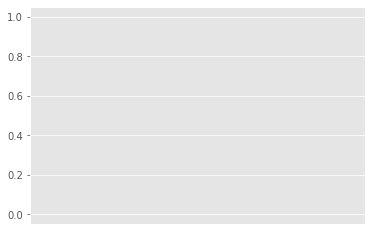

In [127]:

def plotItemsetSupcount(data,w):
    colors = ['red']
    names = ["Itemset"]
    x = data.iloc[:,:1].values
    y = data.iloc[:,1:].values
    xticks = [i[0] for i in x]
    
    fig, ax = plt.subplots()

    x = np.arange(len(y))
    ax.bar(x, y[:,0], color=colors[0], width=0.5, label=names[0])
    ax.set(xticks=x, xticklabels=xticks)
    ax.legend()
    plt.xlabel('ItemSets')
    plt.ylabel("Support count")
    plt.show()


In [128]:
#Finding Strong association Rules
rules = {
        'antecedent':[],'consequent':[]
        }
for i in range(len(l3.values[0][0])):
    rules['antecedent'].append(l3.values[0][0][i])
    rules['consequent'].append(l3.values[0][0][:i]+l3.values[0][0][i+1:])
    rules['consequent'].append(l3.values[0][0][i])
    rules['antecedent'].append(l3.values[0][0][:i]+l3.values[0][0][i+1:])

rules = pd.DataFrame(rules)
def getNumerator(data,x):
    
    for i in range(len(data)):
        x.sort()
        y = data[i][:1][0]
        y.sort()
        if x==y:
            return data[i][:][1]
    
    #set = [[data[i][:1][0]] + [data[i][:][1]] for i in range(len(data))]
def getDenomenator(data,x) :       
    for i in range(len(data)):
        if data[i][:1][0]==x:
            print(x,data[i][:][1])
            return data[i][:][1]
confidences = []
for x in rules.values:
    n=getNumerator(l3.values,list(x[0])+list(x[1]))
    d = getDenomenator(l2.values,x[0]) if len(x[0])>1 else getDenomenator(l1.values,x[0])
    confidences.append(n/d)
rules['confidences'] =confidences


#Support
supports = []
for x in rules.values:
    n=getNumerator(l3.values,list(x[0])+list(x[1]))
    supports.append(n/N)
rules['supports'] =supports

IndexError: index 0 is out of bounds for axis 0 with size 0

In [6]:
def FindStrongRules(rules,minconf):
    i =0
    while True:
        if i >= len(rules.values):
            break
        if rules.values[i][2] < minconf:
            rules.drop(rules.index[[i]],inplace=True)
            i-=1
        i+=1
    return rules

In [7]:
strongrules = FindStrongRules(rules.copy(),minconf)

In [8]:
def Plot_Rules_Conf(rules):
    plt.style.use('ggplot')
    confidences = [ i/10 for i in range(2,8)]
    no_of_rules = [ len(FindStrongRules(rules.copy(),c)) for c in confidences] 
    plt.xlabel('Confidence Level')
    plt.yticks(range(len(rules)*2))
    plt.ylabel('No of Rules')
    plt.title('Apriori Algorithm at Different confidence')
    plt.plot(confidences,no_of_rules)
    plt.show()

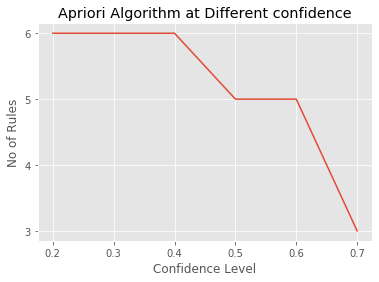

In [9]:
Plot_Rules_Conf(rules)

# zcdzcvdvdsv